In [33]:
import pandas as pd
import numpy as np
import seaborn as sns


In [34]:
data=pd.read_csv('insurance.csv')

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [36]:
#finding outliers for age
#IQR=q3-q1 upperBound=q3+1.5IQR lowerBound=q1-1.5IQR

In [37]:
IQR=data['age'].quantile(0.75)-data['age'].quantile(0.25)
IQR

24.0

In [38]:
lowerBound=data['age'].quantile(0.25)-(1.5*IQR)
lowerBound

-9.0

In [39]:
upperBound=data['age'].quantile(0.75)+(1.5*IQR)
upperBound
     

87.0

<Axes: ylabel='age'>

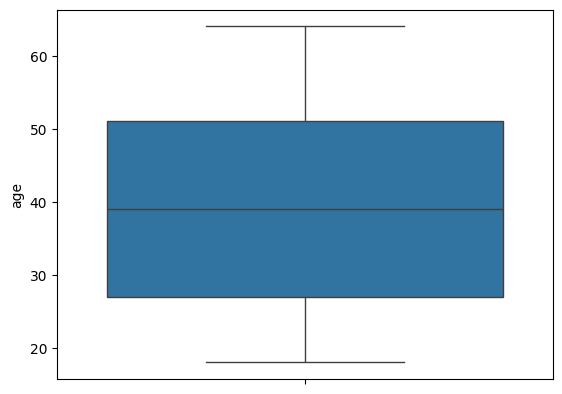

In [40]:
sns.boxplot(data['age'])

In [41]:
from sklearn.preprocessing import LabelEncoder
     

label_encoder= LabelEncoder()
     

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [42]:
data['age']=label_encoder.fit_transform(data['age'])
data['bmi']=label_encoder.fit_transform(data['bmi'])
data['smoker']=label_encoder.fit_transform(data['smoker'])
     

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,1,female,102,0,1,southwest,16884.92
1,0,male,161,1,0,southeast,1725.55
2,10,male,153,3,0,southeast,4449.46
3,15,male,50,0,0,northwest,21984.47
4,14,male,112,0,0,northwest,3866.86


In [87]:
data1= data.drop(columns = ['sex'],axis = 1)


In [88]:
data1

,age,bmi,children,smoker,region,expenses
0,1,102,0,1,southwest,16884.92
1,0,161,1,0,southeast,1725.55
2,10,153,3,0,southeast,4449.46
3,15,50,0,0,northwest,21984.47
4,14,112,0,0,northwest,3866.86
...,...,...,...,...,...,...
1333,32,133,3,0,northwest,10600.55
1334,0,142,0,0,northeast,2205.98
1335,0,192,0,0,southeast,1629.83
1336,3,81,0,0,southwest,2007.95


In [89]:
data2= data1.drop(columns = ['region'],axis = 1)
data2

,age,bmi,children,smoker,expenses
0,1,102,0,1,16884.92
1,0,161,1,0,1725.55
2,10,153,3,0,4449.46
3,15,50,0,0,21984.47
4,14,112,0,0,3866.86
...,...,...,...,...,...
1333,32,133,3,0,10600.55
1334,0,142,0,0,2205.98
1335,0,192,0,0,1629.83
1336,3,81,0,0,2007.95


In [90]:
df = pd.DataFrame(data2)
x= df.drop(columns = ['expenses'],axis = 1)
y =df['expenses']

In [91]:
x

,age,bmi,children,smoker
0,1,102,0,1
1,0,161,1,0
2,10,153,3,0
3,15,50,0,0
4,14,112,0,0
...,...,...,...,...
1333,32,133,3,0
1334,0,142,0,0
1335,0,192,0,0
1336,3,81,0,0


In [92]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [93]:
#Standardization is a common preprocessing step where the features are transformed to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
#the standardscaler is assigned to the variable scaler 
scaler = StandardScaler()
#now the df-x is fitted into the standardscaler by using .fit 
scaler.fit(x)

StandardScaler()

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5, random_state = 0)

In [100]:
x.shape,y.shape

((1338, 4), (1338,))

In [96]:
x_train.head()

,age,bmi,children,smoker
515,40,180,0,0
285,28,89,1,0
1129,1,13,0,0
71,13,108,5,0
561,36,150,0,0


In [97]:
x_test.head()

,age,bmi,children,smoker
578,34,125,1,0
610,29,117,1,0
569,30,227,2,1
1034,43,207,0,0
198,33,10,0,0


In [98]:
y_test.head()

578      9724.53
610      8547.69
569     45702.02
1034    12950.07
198      9644.25
Name: expenses, dtype: float64

In [99]:
y_train.head()

515     11362.76
285      7742.11
1129     1728.90
71       6799.46
561     10923.93
Name: expenses, dtype: float64

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(x_test)
y_pred

array([ 1.14573076e+04,  9.87990628e+03,  3.81345099e+04,  1.62937810e+04,
        6.37397865e+03,  3.03657654e+03,  7.77118749e+02,  1.45778122e+04,
        8.93669044e+03,  7.48331752e+03,  3.84002369e+03,  9.98036725e+03,
        9.04406808e+03,  3.86479236e+03,  2.72586495e+04,  1.12573266e+04,
        1.07681297e+04,  5.66929029e+03,  8.07086369e+03,  2.62911605e+04,
        3.30709399e+04,  1.43549946e+04,  1.11894919e+04,  3.21106028e+04,
        4.60301207e+03,  8.99739832e+03,  2.31728154e+02,  1.04945680e+04,
        3.87669369e+03,  1.03091261e+04,  8.88741342e+03,  4.05670379e+04,
        1.61757033e+04,  1.43485734e+04,  2.35389326e+04,  4.44327969e+03,
        1.34427333e+04,  3.09964536e+04,  3.32485243e+04,  3.90477530e+03,
        3.02467521e+03,  4.18760053e+03,  2.95419099e+04,  3.94205281e+04,
        2.80970949e+04,  4.99509141e+03,  1.11078238e+04,  7.44286412e+03,
        2.73018389e+03,  1.04184107e+04,  5.26982380e+03,  3.21914556e+03,
        3.29704789e+04,  